<a href="https://colab.research.google.com/github/Neelanjan-Goswami/ML-Internship-B/blob/master/Doubt_in_ML_model(linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline   

sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
car_data=pd.read_csv('data.csv')

In [3]:

car_data = car_data.drop(['Market Category' , 'Number of Doors','Engine Fuel Type'] , axis = 1)
car_data.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [4]:
#Renaming the Columns
car_data = car_data.rename(columns={'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode', 'highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price' })
car_data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [5]:
# Rows containing duplicate data
duplicate_rows_car_data = car_data[car_data.duplicated()]


In [6]:
# Dropping the duplicates 
car_data = car_data.drop_duplicates()
car_data.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [7]:
# Finding the null values.
print(car_data.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


In [8]:
# Dropping the missing values.
car_data = car_data.dropna() 
car_data.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
Price            11024
dtype: int64

In [9]:
# After dropping the values
print(car_data.isnull().sum()) 

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


In [10]:
#Finding IQR
Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21426.25
dtype: float64


In [11]:
car_data.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.334048,-0.032824,0.272320,0.225231,0.086020,0.209394
HP,0.334048,1.000000,0.786647,-0.418886,-0.471283,0.041488,0.661622
Cylinders,-0.032824,0.786647,1.000000,-0.611245,-0.631976,0.041329,0.554951
MPG-H,0.272320,-0.418886,-0.611245,1.000000,0.841924,-0.023580,-0.208408
MPG-C,0.225231,-0.471283,-0.631976,0.841924,1.000000,-0.006110,-0.233076
Popularity,0.086020,0.041488,0.041329,-0.023580,-0.006110,1.000000,-0.047207
Price,0.209394,0.661622,0.554951,-0.208408,-0.233076,-0.047207,1.000000


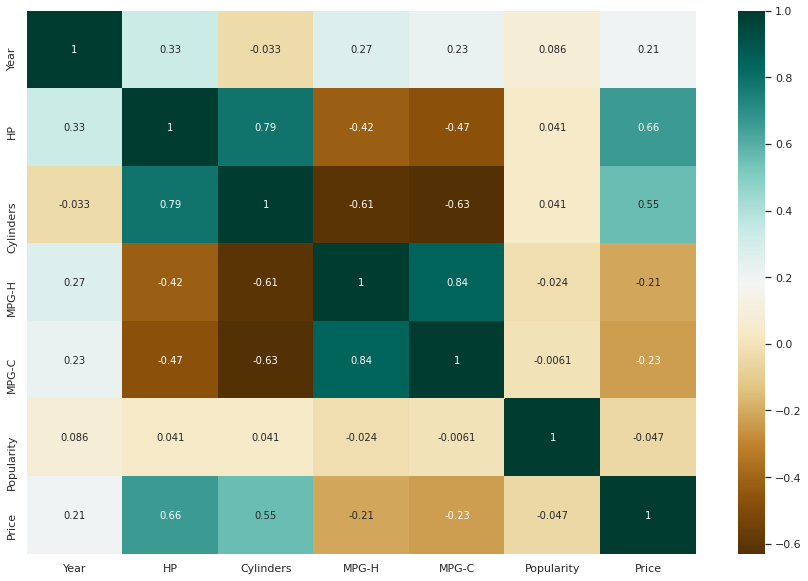

In [12]:
#Plotting Correlation Matrix
plt.figure(figsize=(15,10))
corrMatrix = car_data.corr()
sns.heatmap(corrMatrix,cmap="BrBG", annot=True)

In [21]:
# create training and testing variables
y = car_data['Price']
X_train, X_test, y_train, y_test = train_test_split(car_data, y, test_size=0.2)
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape) 

(8819, 13) (8819,)
(2205, 13) (2205,)


In [22]:
dcc = car_data.select_dtypes(exclude=[np.number]).columns
dcc

Index([], dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
#Creating the object instance
label_enc = LabelEncoder()
for i in dcc:
  car_data[i] = label_enc.fit_transform(car_data[i])
print('Label Encoded Data')
car_data.head()  

Label Encoded Data


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,4,1,2011,335.0,6.0,3,3,0,8,26,19,3916,46135
1,4,0,2011,300.0,6.0,3,3,0,6,28,19,3916,40650
2,4,0,2011,300.0,6.0,3,3,0,8,28,20,3916,36350
3,4,0,2011,230.0,6.0,3,3,0,8,28,18,3916,29450
4,4,0,2011,230.0,6.0,3,3,0,6,28,18,3916,34500


In [24]:
#Fit in a model
from sklearn.linear_model import LinearRegression
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

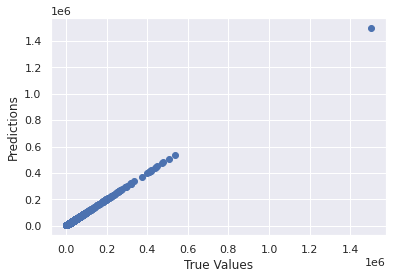

In [25]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [28]:
model.score(X_test,predictions)

1.0

In [29]:
y_pred=predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

       Actual  Predicted
1195    34770    34770.0
1906    29625    29625.0
6344    18795    18795.0
6241    26940    26940.0
2471    32890    32890.0
10412   33590    33590.0
7902    42870    42870.0
89       2000     2000.0
11852   59700    59700.0
7521    32810    32810.0
2173    42405    42405.0
1991    35585    35585.0
503     36915    36915.0
3341    26240    26240.0
9665   217550   217550.0
5731    44140    44140.0
182      2547     2547.0
4564    45845    45845.0
5352    37480    37480.0
11705   26749    26749.0
5036    22750    22750.0
6592    45800    45800.0
5894    19395    19395.0
11505   49700    49700.0
8257    46675    46675.0


In [30]:
import sklearn.metrics as metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 2.7355682647305534e-11
Mean Squared Error: 2.9682340664468333e-21
Root Mean Squared Error: 5.448150205755008e-11


In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier(random_state=0)
dtc_model.fit(X_train,y_train)
y_pred=dtc_model.predict(X_test)
#Calculating the accuracies
print('Training Accuracy :',dtc_model.score(X_train,y_train))
print('Testing Accuracy :',dtc_model.score(X_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.3723356009070295
